In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 

%matplotlib inline

df = pd.read_csv('yellow_tripdata_sample.csv', parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [2]:
# Columns to analyze
cols = ['passenger_count','trip_distance','fare_amount','total_amount','tip_amount','extra']

stats_summary = []
for c in cols:
    series = df[c].dropna()
    stats_summary.append({
        'feature': c,
        'count': series.count(),
        'missing': df[c].isna().sum(),
        'mean': series.mean(),
        'median': series.median(),
        'mode': series.mode().iloc[0] if not series.mode().empty else np.nan,
        'min': series.min(),
        'max': series.max(),
        'std': series.std(),
        'variance': series.var(),
        'skewness': series.skew(),
        'kurtosis': series.kurt()
    })

pd.DataFrame(stats_summary).set_index('feature').T


feature,passenger_count,trip_distance,fare_amount,total_amount,tip_amount,extra
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,1.581910,2.890472,18.278593,26.847538,3.483146,1.741457
median,1.000000,1.960000,14.200000,22.200000,3.000000,1.000000
mode,1.000000,0.900000,6.500000,16.320000,0.000000,1.000000
min,0.000000,0.000000,-47.800000,-52.800000,0.000000,-1.000000
max,6.000000,23.900000,180.000000,217.200000,80.000000,7.750000
std,0.911625,3.125268,14.916422,18.092018,4.195507,1.255742
variance,0.831061,9.767299,222.499652,327.321108,17.602279,1.576889
skewness,1.664330,3.288172,3.012440,3.025344,7.328237,1.149621


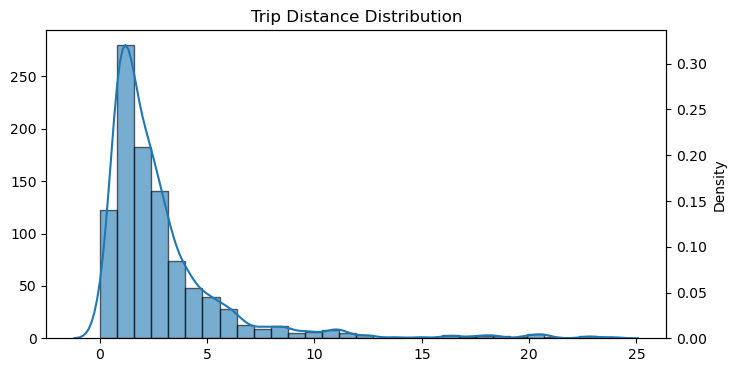

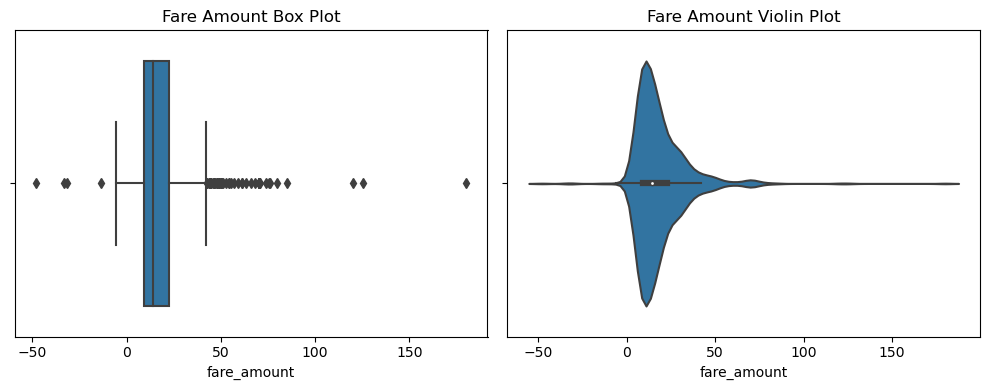

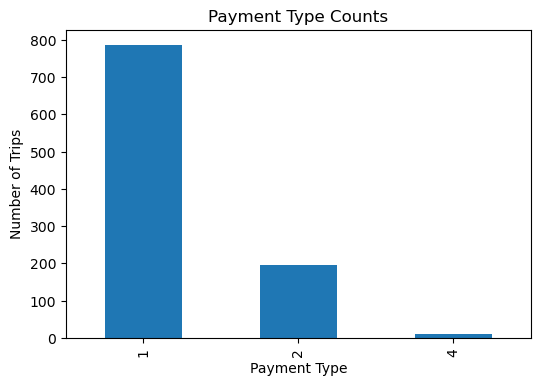

In [3]:
# 1) Histogram + Frequency Polygon for trip_distance
plt.figure(figsize=(8,4))
plt.hist(df['trip_distance'].dropna(), bins=30, alpha=0.6, edgecolor='black')
plt.twinx()
sns.kdeplot(df['trip_distance'].dropna(), bw_adjust=0.5)
plt.title('Trip Distance Distribution')
plt.xlabel('Distance (miles)')
plt.ylabel('Density')
plt.show()

# 2) Box Plot & Violin Plot for fare_amount
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount Box Plot')
plt.subplot(1,2,2)
sns.violinplot(x=df['fare_amount'])
plt.title('Fare Amount Violin Plot')
plt.tight_layout()
plt.show()

# 3) Bar Chart for payment_type counts
payment_counts = df['payment_type'].value_counts()
plt.figure(figsize=(6,4))
payment_counts.plot(kind='bar')
plt.title('Payment Type Counts')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.show()


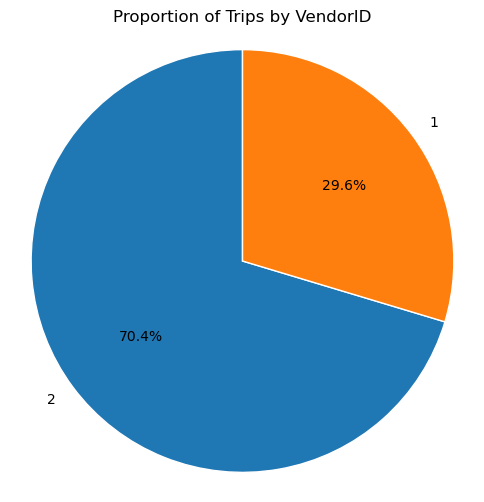

In [4]:
# 4) Pie Chart for VendorID
vendor_counts = df['VendorID'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=90, 
        wedgeprops=dict(edgecolor='w'))
plt.title('Proportion of Trips by VendorID')
plt.axis('equal')   
plt.show()


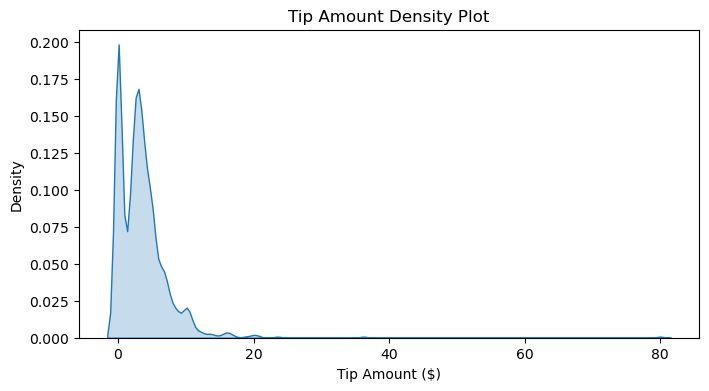

In [5]:
# 5) Density Plot for tip_amount
plt.figure(figsize=(8,4))
sns.kdeplot(df['tip_amount'].dropna(), bw_adjust=0.5, fill=True)
plt.title('Tip Amount Density Plot')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Density')
plt.show()


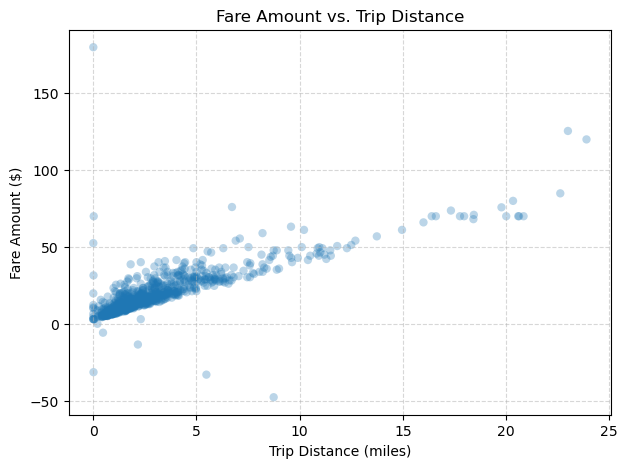

In [6]:
# 6) Scatter Plot: trip_distance vs fare_amount
plt.figure(figsize=(7,5))
plt.scatter(df['trip_distance'], df['fare_amount'], alpha=0.3, edgecolors='none')
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


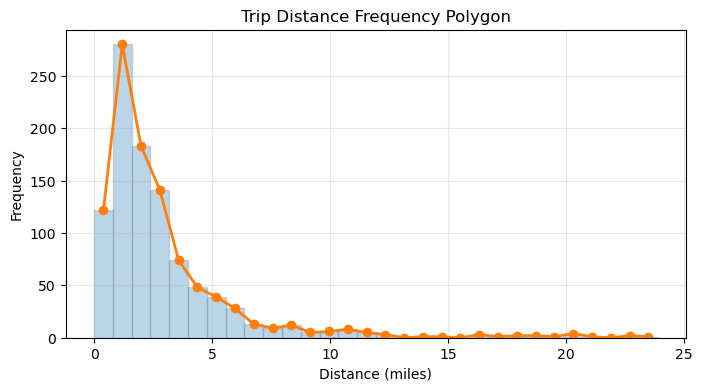

In [10]:
# Frequency Polygon
import numpy as np
import matplotlib.pyplot as plt

counts, bin_edges = np.histogram(df['trip_distance'].dropna(), bins=30)

midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(8,4))

plt.hist(df['trip_distance'].dropna(), bins=30, alpha=0.3, edgecolor='gray')

plt.plot(midpoints, counts, marker='o', linestyle='-', linewidth=2)

plt.title('Trip Distance Frequency Polygon')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()


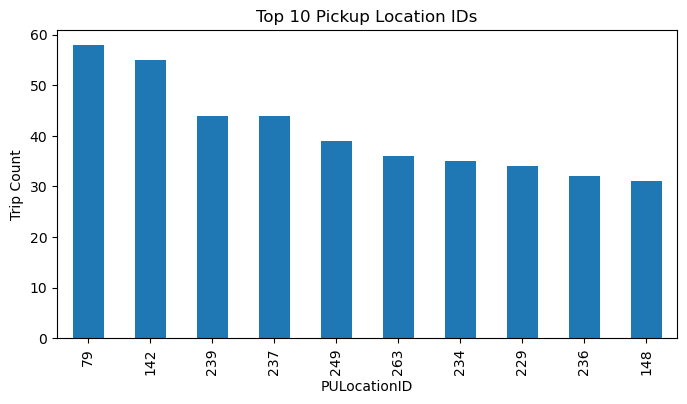

In [8]:
top_zones = df['PULocationID'].value_counts().head(10)
plt.figure(figsize=(8,4))
top_zones.plot(kind='bar')
plt.title('Top 10 Pickup Location IDs')
plt.xlabel('PULocationID')
plt.ylabel('Trip Count')
plt.show()



In [11]:
def confidence_interval(data, confidence=0.95):
    arr = np.array(data.dropna())
    n = len(arr)
    m = arr.mean()
    se = stats.sem(arr)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

for col in ['trip_distance','fare_amount','tip_amount']:
    m, lo, hi = confidence_interval(df[col])
    print(f"{col}: mean={m:.3f}, 95% CI=({lo:.3f}, {hi:.3f})")


trip_distance: mean=2.890, 95% CI=(2.696, 3.085)
fare_amount: mean=18.279, 95% CI=(17.351, 19.207)
tip_amount: mean=3.483, 95% CI=(3.222, 3.744)


In [13]:
tips = df['tip_amount'].dropna()
tstat, pval = stats.ttest_1samp(tips, popmean=2.0)
print(f"One-sample t-test: t={tstat:.3f}, p={pval:.4f}")

group1 = df.loc[df['payment_type']==1, 'fare_amount']
group2 = df.loc[df['payment_type']==2, 'fare_amount']
t2, p2 = stats.ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)
print(f"Two-sample t-test: t={t2:.3f}, p={p2:.4f}")

contingency = pd.crosstab(df['payment_type'], df['RatecodeID'])
chi2, chi_p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square: χ2={chi2:.3f}, p={chi_p:.4f}, dof={dof}")


One-sample t-test: t=11.151, p=0.0000
Two-sample t-test: t=0.247, p=0.8049
Chi-square: χ2=6.853, p=0.5525, dof=8


TripDistance vs FareAmount  →  Pearson r = 0.802, p = 0.0000
TripDistance vs FareAmount  →  Spearman ρ = 0.873, p = 0.0000

FareAmount vs TipAmount  →  Pearson r = 0.493, p = 0.0000
FareAmount vs TipAmount  →  Spearman ρ = 0.416, p = 0.0000


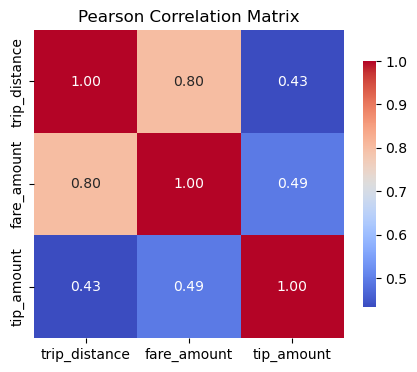

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns

x = df['trip_distance'].dropna()
y = df['fare_amount'].dropna().loc[x.index]  
pearson_r, pearson_p = pearsonr(x, y)
spearman_r, spearman_p = spearmanr(x, y)
print(f"TripDistance vs FareAmount  →  Pearson r = {pearson_r:.3f}, p = {pearson_p:.4f}")
print(f"TripDistance vs FareAmount  →  Spearman ρ = {spearman_r:.3f}, p = {spearman_p:.4f}\n")

x2 = df['fare_amount'].dropna()
y2 = df['tip_amount'].dropna().loc[x2.index]
pearson_r2, pearson_p2 = pearsonr(x2, y2)
spearman_r2, spearman_p2 = spearmanr(x2, y2)
print(f"FareAmount vs TipAmount  →  Pearson r = {pearson_r2:.3f}, p = {pearson_p2:.4f}")
print(f"FareAmount vs TipAmount  →  Spearman ρ = {spearman_r2:.3f}, p = {spearman_p2:.4f}")

corr_matrix = df[['trip_distance','fare_amount','tip_amount']].corr(method='pearson')

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Pearson Correlation Matrix')
plt.show()
